In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [188]:
data = pd.read_csv('STA160_Midterm_Data_Processed.csv', dtype={'Response': str})

Response := HeartDisease | Stroke | Diabetes

In [189]:
data

,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Response
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,Female,60-64,High school graduate,"$15,000-$20,000",000
1,0.0,0.0,0.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,Female,50-54,College graduate,"$0-$10,000",000
2,1.0,1.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,Female,60-64,High school graduate,"$75,000+",000
3,1.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,Female,70-74,Some high school,"$35,000-$50,000",000
4,1.0,1.0,1.0,24.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,Female,70-74,Some college or technical school,"$20,000-$25,000",000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,Male,40-44,College graduate,"$50,000-$75,000",000
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,Female,70-74,Elementary,"$20,000-$25,000",001
253677,0.0,0.0,1.0,28.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Female,25-29,Some college or technical school,"$10,000-$15,000",000
253678,1.0,0.0,1.0,23.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,Male,50-54,Some college or technical school,"$0-$10,000",000


In [190]:
columns = list(data.columns)
categorical_vars = columns[:3] + columns[4:-1]

# EDA

### Response Variable

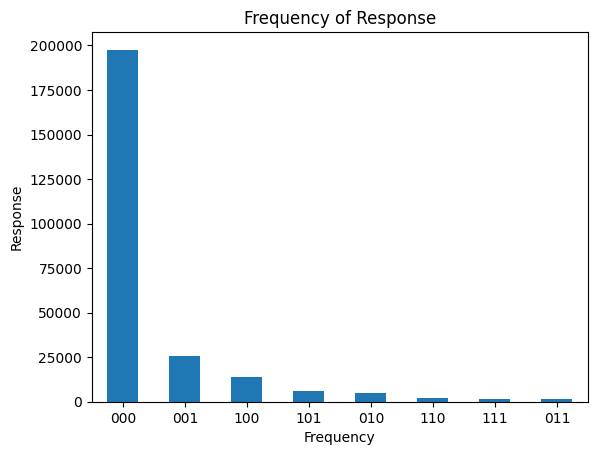

In [191]:
# histogram of response, sorted by frequency
data['Response'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Frequency of Response')
plt.xlabel('Frequency')
plt.ylabel('Response')
plt.xticks(rotation=0)
plt.show()

### Binary Variables

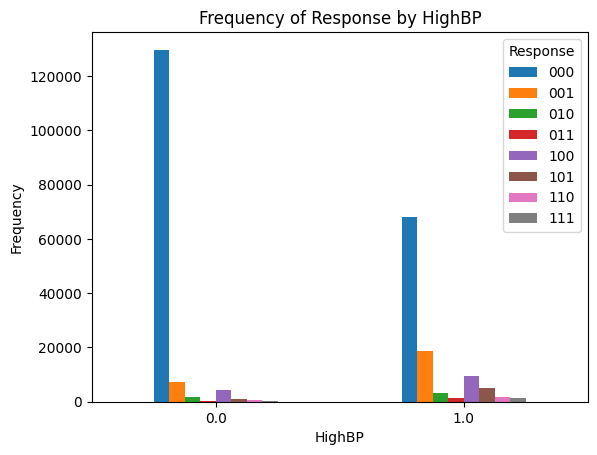

In [192]:
# HighBP
data['Response'].groupby(data['HighBP']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by HighBP')
plt.xlabel('HighBP')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

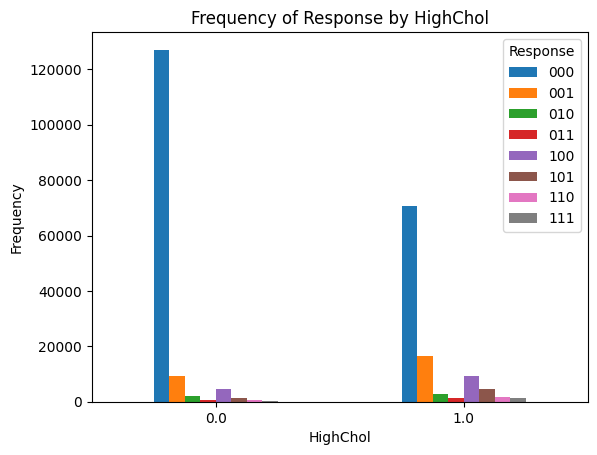

In [193]:
# HighChol
data['Response'].groupby(data['HighChol']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by HighChol')
plt.xlabel('HighChol')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

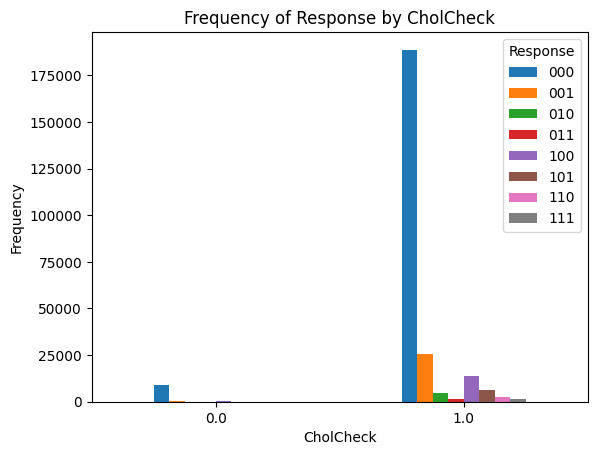

In [194]:
# CholCheck
data['Response'].groupby(data['CholCheck']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by CholCheck')
plt.xlabel('CholCheck')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

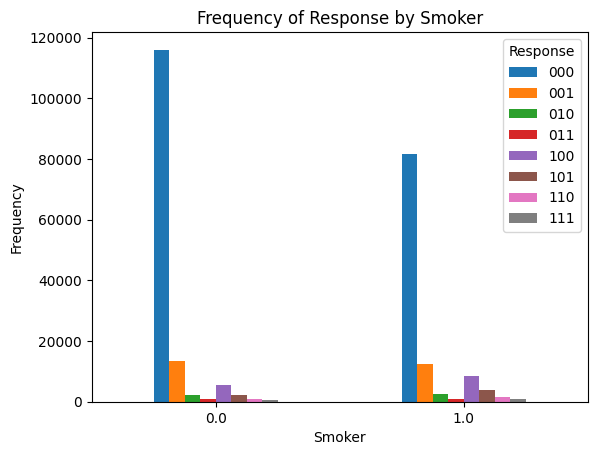

In [195]:
# Smoker
data['Response'].groupby(data['Smoker']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

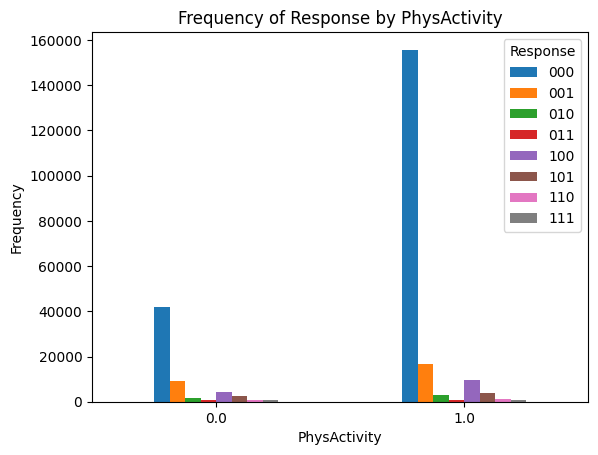

In [196]:
# PhysActivity
data['Response'].groupby(data['PhysActivity']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by PhysActivity')
plt.xlabel('PhysActivity')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

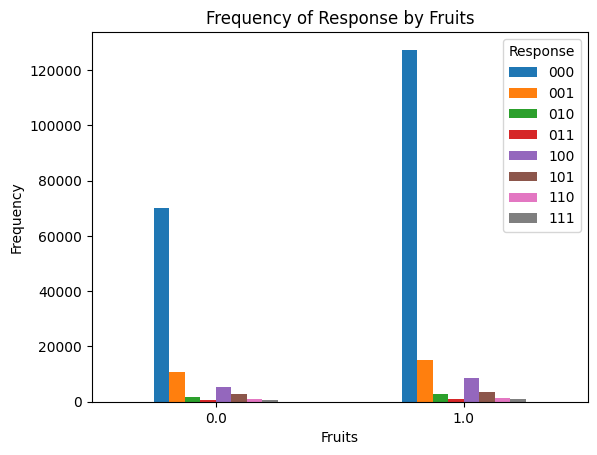

In [197]:
# Fruits
data['Response'].groupby(data['Fruits']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by Fruits')
plt.xlabel('Fruits')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

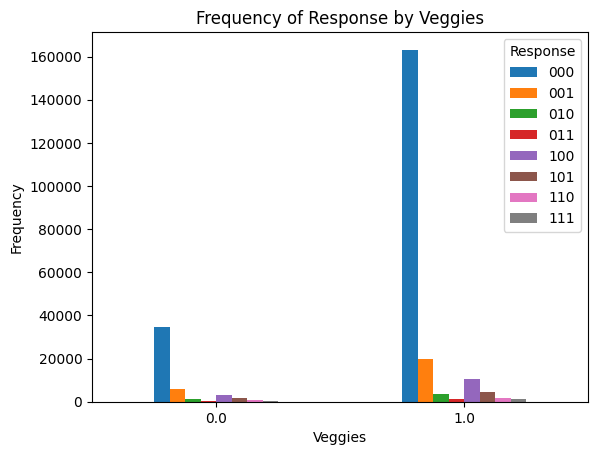

In [198]:
# Veggies
data['Response'].groupby(data['Veggies']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by Veggies')
plt.xlabel('Veggies')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

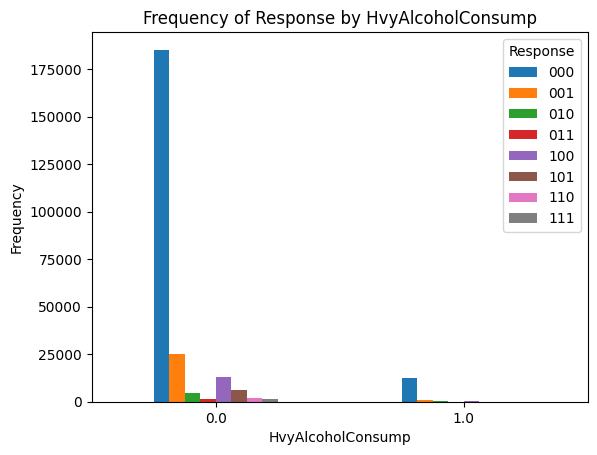

In [199]:
# HvyAlcoholConsump
data['Response'].groupby(data['HvyAlcoholConsump']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by HvyAlcoholConsump')
plt.xlabel('HvyAlcoholConsump')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

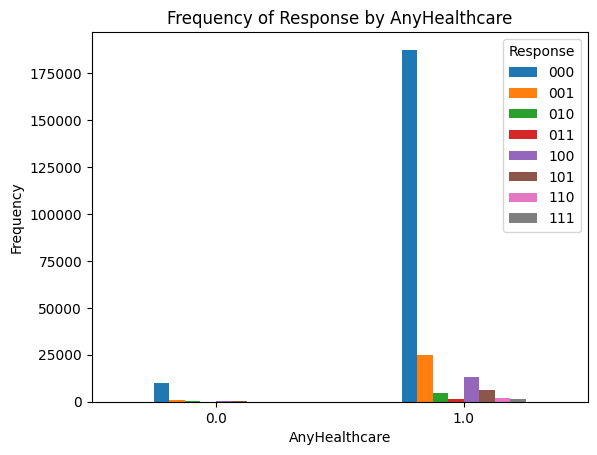

In [200]:
# AnyHealthcare
data['Response'].groupby(data['AnyHealthcare']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by AnyHealthcare')
plt.xlabel('AnyHealthcare')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

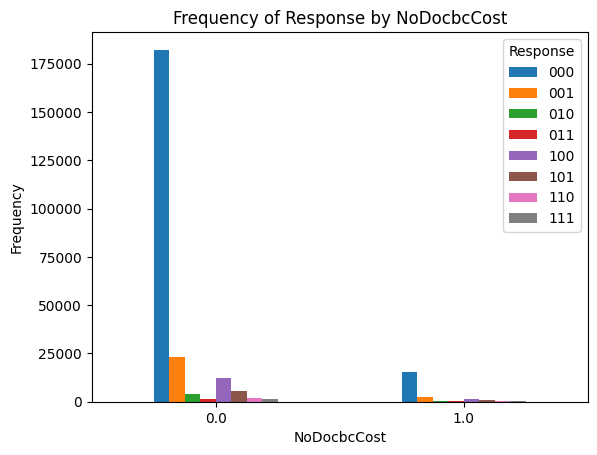

In [201]:
# NoDocbcCost
data['Response'].groupby(data['NoDocbcCost']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by NoDocbcCost')
plt.xlabel('NoDocbcCost')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

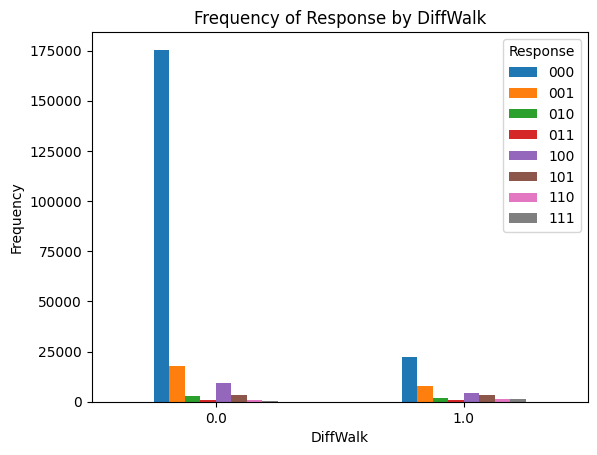

In [202]:
# DiffWalk
data['Response'].groupby(data['DiffWalk']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by DiffWalk')
plt.xlabel('DiffWalk')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

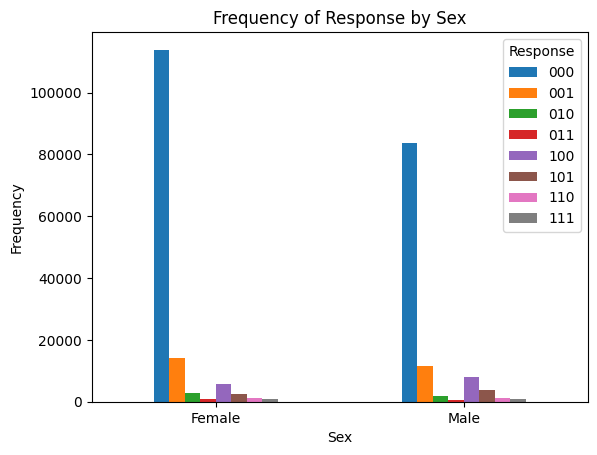

In [203]:
# sex
data['Response'].groupby(data['Sex']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### Other Categorical Variables

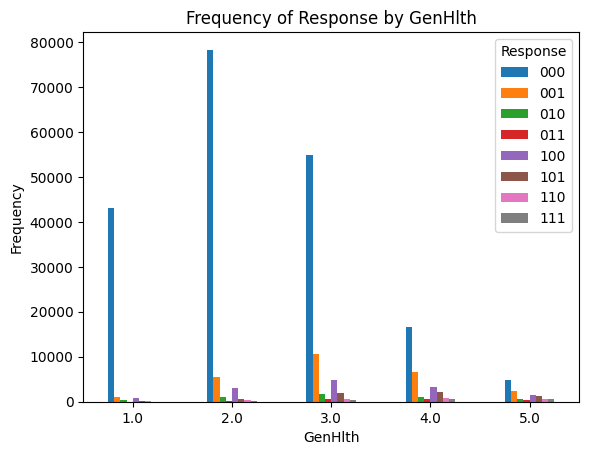

In [204]:
# GenHlth
data['Response'].groupby(data['GenHlth']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by GenHlth')
plt.xlabel('GenHlth')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

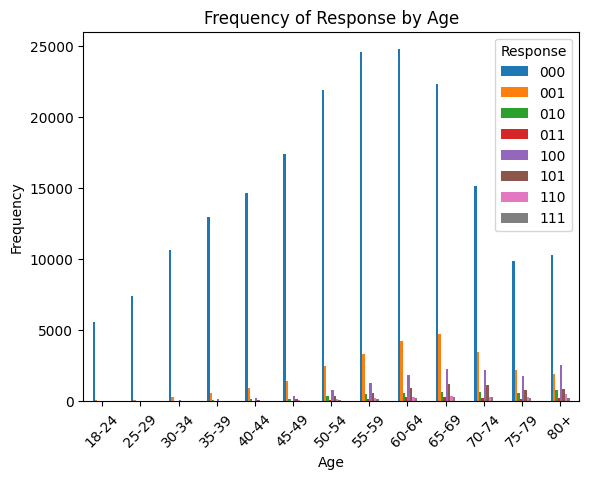

In [205]:
# Age
data['Response'].groupby(data['Age']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

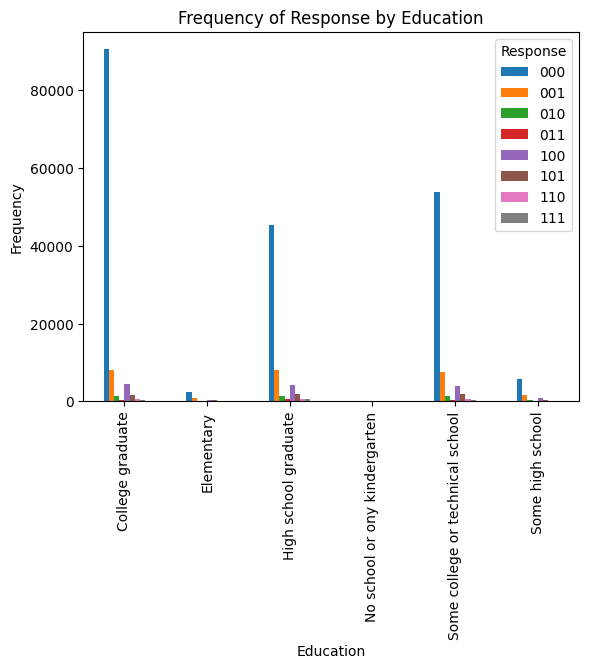

In [206]:
# Education
data['Response'].groupby(data['Education']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

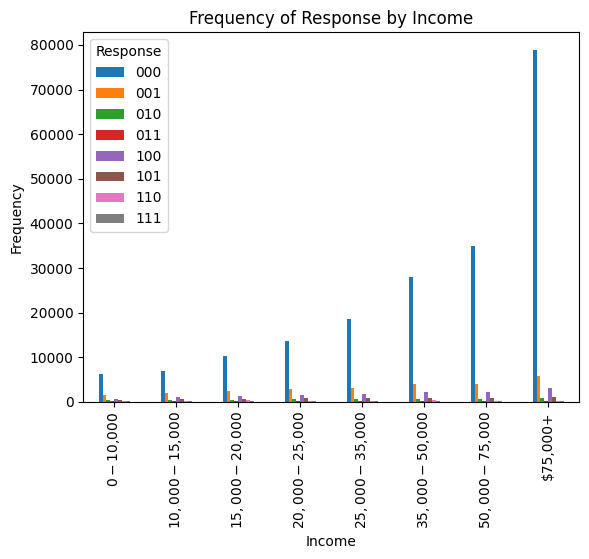

In [207]:
# Income
data['Response'].groupby(data['Income']).value_counts().unstack().plot(kind='bar', stacked=False)
plt.title('Frequency of Response by Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Continuos Variables

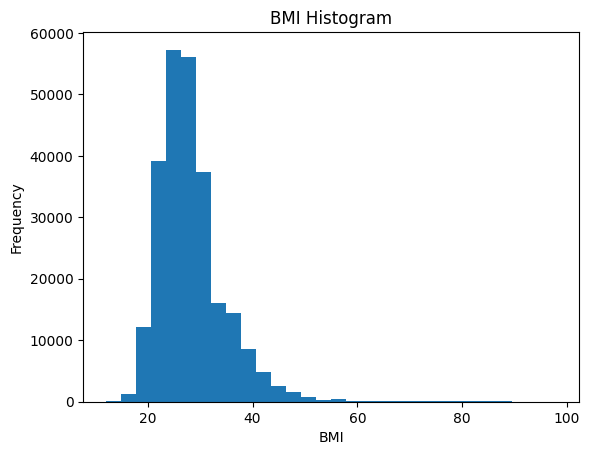

In [208]:
# BMI histogram
plt.hist(data['BMI'], bins=30)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

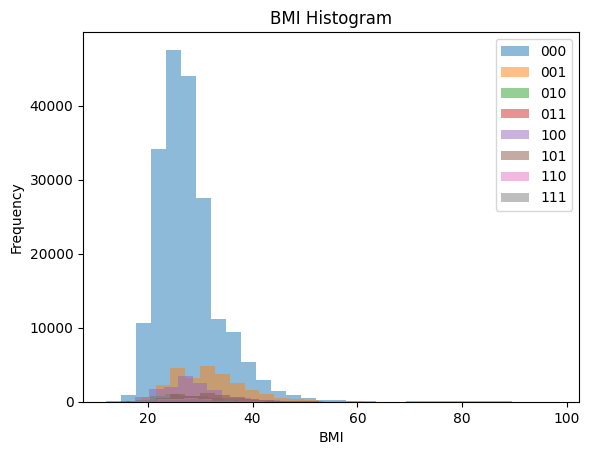

In [209]:
# BMI by Response
plt.hist(data[data['Response']=='000']['BMI'], bins=30, label='000', alpha=0.5)
plt.hist(data[data['Response']=='001']['BMI'], bins=30, label='001', alpha=0.5)
plt.hist(data[data['Response']=='010']['BMI'], bins=30, label='010', alpha=0.5)
plt.hist(data[data['Response']=='011']['BMI'], bins=30, label='011', alpha=0.5)
plt.hist(data[data['Response']=='100']['BMI'], bins=30, label='100', alpha=0.5)
plt.hist(data[data['Response']=='101']['BMI'], bins=30, label='101', alpha=0.5)
plt.hist(data[data['Response']=='110']['BMI'], bins=30, label='110', alpha=0.5)
plt.hist(data[data['Response']=='111']['BMI'], bins=30, label='111', alpha=0.5)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

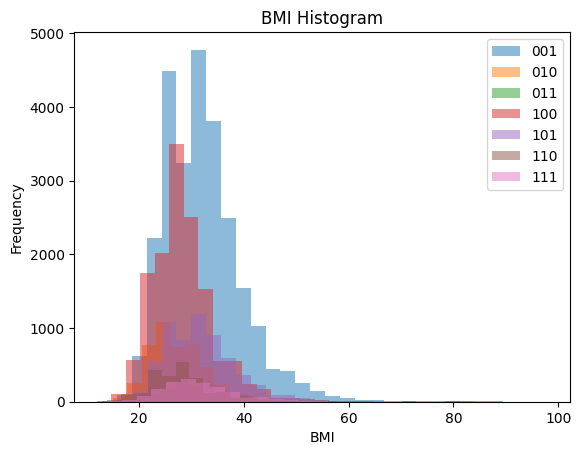

In [210]:
# without 000
plt.hist(data[data['Response']=='001']['BMI'], bins=30, label='001', alpha=0.5)
plt.hist(data[data['Response']=='010']['BMI'], bins=30, label='010', alpha=0.5)
plt.hist(data[data['Response']=='011']['BMI'], bins=30, label='011', alpha=0.5)
plt.hist(data[data['Response']=='100']['BMI'], bins=30, label='100', alpha=0.5)
plt.hist(data[data['Response']=='101']['BMI'], bins=30, label='101', alpha=0.5)
plt.hist(data[data['Response']=='110']['BMI'], bins=30, label='110', alpha=0.5)
plt.hist(data[data['Response']=='111']['BMI'], bins=30, label='111', alpha=0.5)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

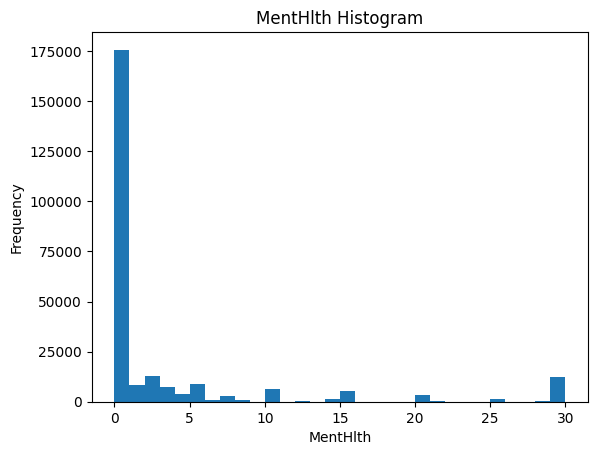

In [211]:
# MentHlth histogram
plt.hist(data['MentHlth'], bins=30)
plt.title('MentHlth Histogram')
plt.xlabel('MentHlth')
plt.ylabel('Frequency')
plt.show()

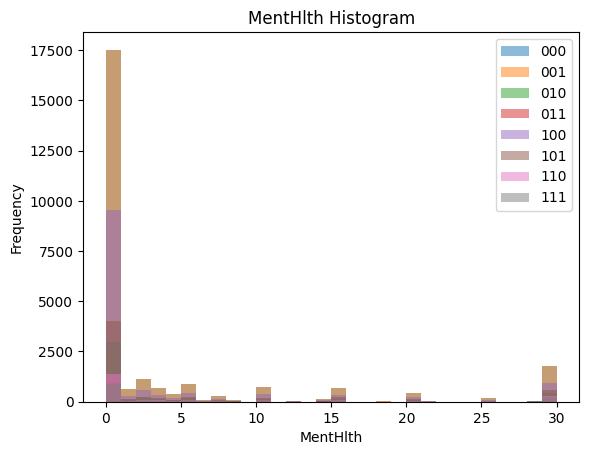

In [212]:
# MentlHlth by Response
plt.hist(data[data['Response']=='001']['MentHlth'], bins=30, label='000', alpha=0.5)
plt.hist(data[data['Response']=='001']['MentHlth'], bins=30, label='001', alpha=0.5)
plt.hist(data[data['Response']=='010']['MentHlth'], bins=30, label='010', alpha=0.5)
plt.hist(data[data['Response']=='011']['MentHlth'], bins=30, label='011', alpha=0.5)
plt.hist(data[data['Response']=='100']['MentHlth'], bins=30, label='100', alpha=0.5)
plt.hist(data[data['Response']=='101']['MentHlth'], bins=30, label='101', alpha=0.5)
plt.hist(data[data['Response']=='110']['MentHlth'], bins=30, label='110', alpha=0.5)
plt.hist(data[data['Response']=='111']['MentHlth'], bins=30, label='111', alpha=0.5)
plt.title('MentHlth Histogram')
plt.xlabel('MentHlth')
plt.ylabel('Frequency')
plt.legend()
plt.show()

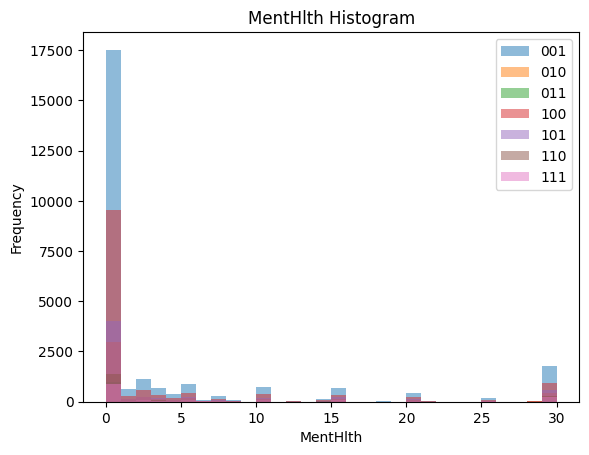

In [213]:
# without 000
plt.hist(data[data['Response']=='001']['MentHlth'], bins=30, label='001', alpha=0.5)
plt.hist(data[data['Response']=='010']['MentHlth'], bins=30, label='010', alpha=0.5)
plt.hist(data[data['Response']=='011']['MentHlth'], bins=30, label='011', alpha=0.5)
plt.hist(data[data['Response']=='100']['MentHlth'], bins=30, label='100', alpha=0.5)
plt.hist(data[data['Response']=='101']['MentHlth'], bins=30, label='101', alpha=0.5)
plt.hist(data[data['Response']=='110']['MentHlth'], bins=30, label='110', alpha=0.5)
plt.hist(data[data['Response']=='111']['MentHlth'], bins=30, label='111', alpha=0.5)
plt.title('MentHlth Histogram')
plt.xlabel('MentHlth')
plt.ylabel('Frequency')
plt.legend()
plt.show()

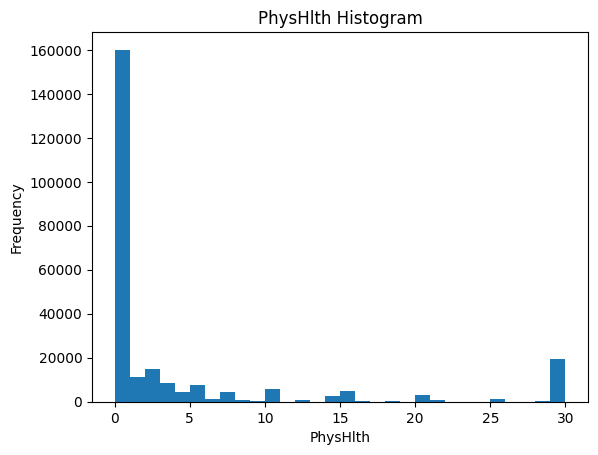

In [214]:
# PhysHlth histogram
plt.hist(data['PhysHlth'], bins=30)
plt.title('PhysHlth Histogram')
plt.xlabel('PhysHlth')
plt.ylabel('Frequency')
plt.show()

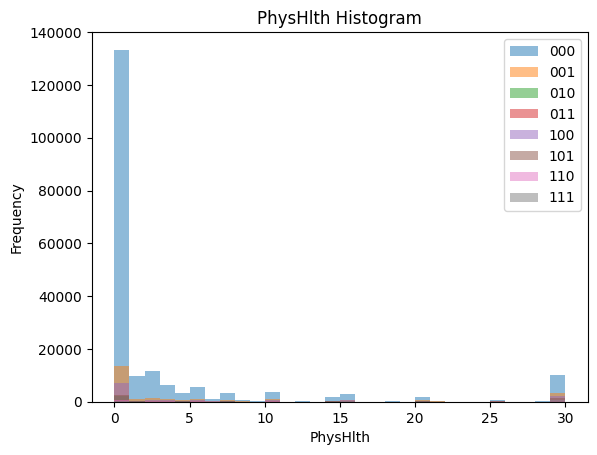

In [215]:
# PhysHlth by Response
plt.hist(data[data['Response']=='000']['PhysHlth'], bins=30, label='000', alpha=0.5)
plt.hist(data[data['Response']=='001']['PhysHlth'], bins=30, label='001', alpha=0.5)
plt.hist(data[data['Response']=='010']['PhysHlth'], bins=30, label='010', alpha=0.5)
plt.hist(data[data['Response']=='011']['PhysHlth'], bins=30, label='011', alpha=0.5)
plt.hist(data[data['Response']=='100']['PhysHlth'], bins=30, label='100', alpha=0.5)
plt.hist(data[data['Response']=='101']['PhysHlth'], bins=30, label='101', alpha=0.5)
plt.hist(data[data['Response']=='110']['PhysHlth'], bins=30, label='110', alpha=0.5)
plt.hist(data[data['Response']=='111']['PhysHlth'], bins=30, label='111', alpha=0.5)
plt.title('PhysHlth Histogram')
plt.xlabel('PhysHlth')
plt.ylabel('Frequency')
plt.legend()
plt.show()

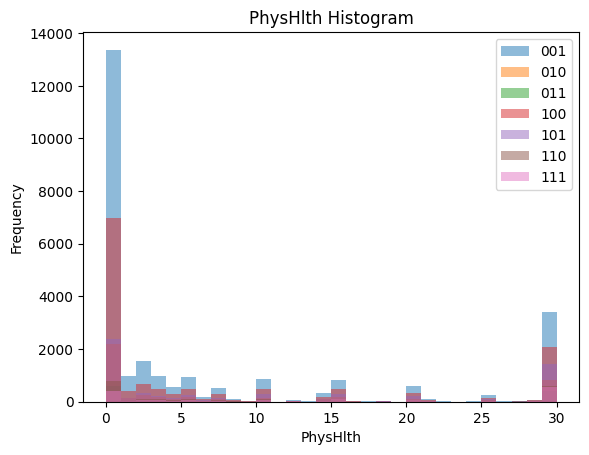

In [216]:
# without 000
plt.hist(data[data['Response']=='001']['PhysHlth'], bins=30, label='001', alpha=0.5)
plt.hist(data[data['Response']=='010']['PhysHlth'], bins=30, label='010', alpha=0.5)
plt.hist(data[data['Response']=='011']['PhysHlth'], bins=30, label='011', alpha=0.5)
plt.hist(data[data['Response']=='100']['PhysHlth'], bins=30, label='100', alpha=0.5)
plt.hist(data[data['Response']=='101']['PhysHlth'], bins=30, label='101', alpha=0.5)
plt.hist(data[data['Response']=='110']['PhysHlth'], bins=30, label='110', alpha=0.5)
plt.hist(data[data['Response']=='111']['PhysHlth'], bins=30, label='111', alpha=0.5)
plt.title('PhysHlth Histogram')
plt.xlabel('PhysHlth')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [217]:
# conditional entropy of Response given HighBP
def cond_entropy(data, y, x):
    cross = pd.crosstab(data[y], data[x], margins=True, normalize='all')

    num_response = cross.shape[0] - 1
    num_cat = cross.shape[1] - 1

    ce_sum = 0

    for i in range(num_response):
        for j in range(num_cat):
            if cross.iloc[i, j] != 0:
                ce_sum += cross.iloc[i, j] * np.log2(cross.iloc[i, j] / cross.iloc[num_response, j])

    return -ce_sum

In [219]:
def entropy(data, y):
    probs = list(data[y].value_counts(normalize=True))

    n = len(probs)

    e_sum = 0

    for i in range(n):
        if probs[i] != 0:
            e_sum += probs[i] * np.log2(probs[i])

    return -e_sum

In [220]:
response_entropy = entropy(data, 'Response')

In [221]:
conditional_entropies = {var: cond_entropy(data, 'Response', var) for var in categorical_vars}

In [222]:
# sorted conditional entropies
sorted_conditional_entropies = dict(sorted(conditional_entropies.items(), key=lambda x: x[1], reverse=False))

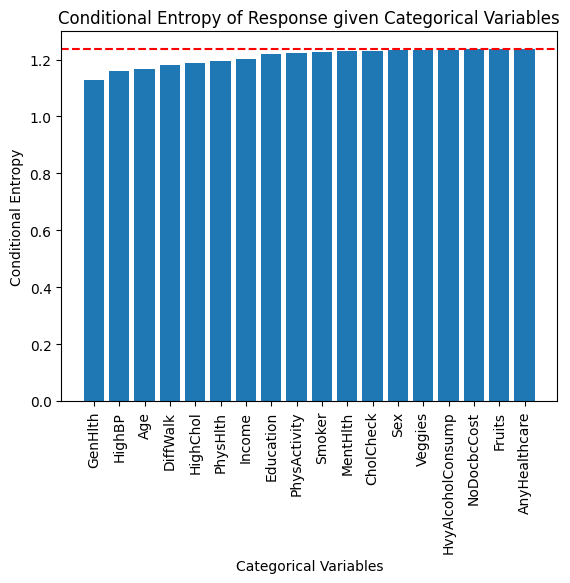

In [223]:
# bar plot of conditional entropy
plt.bar(sorted_conditional_entropies.keys(), sorted_conditional_entropies.values())
plt.title('Conditional Entropy of Response given Categorical Variables')
plt.xlabel('Categorical Variables')
plt.ylabel('Conditional Entropy')
plt.xticks(rotation=90)
# line for CE[Y]
plt.axhline(y=response_entropy, color='r', linestyle='--')
plt.show()

In [224]:
# mutual information
mutual_information = {var: response_entropy - cond_en for var, cond_en in conditional_entropies.items()}

In [225]:
# sorted mutual information
sorted_mutual_information = dict(sorted(mutual_information.items(), key=lambda item: item[1], reverse=True))

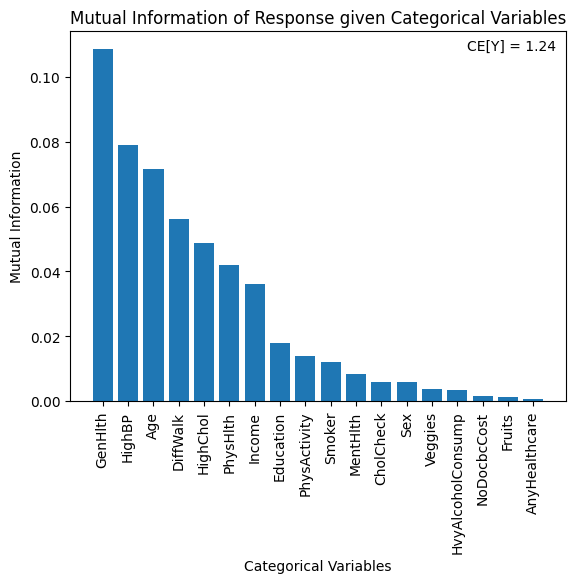

In [226]:
# bar plot of mutual information
plt.bar(sorted_mutual_information.keys(), sorted_mutual_information.values())
plt.title('Mutual Information of Response given Categorical Variables')
plt.xlabel('Categorical Variables')
plt.ylabel('Mutual Information')
plt.xticks(rotation=90)
plt.annotate(f'CE[Y] = {response_entropy:.2f}', xy=(0, 0), xytext=(0.8, 0.95), textcoords='axes fraction')
plt.show()

In [227]:
def mutual_conditional_entropy(data, x, y):

    ce_y = entropy(data, y)
    ce_x = entropy(data, x)

    ce_y_x = cond_entropy(data, y, x)
    ce_x_y = cond_entropy(data, x, y)

    mce_y_x = (((ce_y - ce_y_x) / ce_y) + ((ce_x - ce_x_y) / ce_x)) / 2

    return mce_y_x

In [228]:
mutual_conditional_entropies = {var: mutual_conditional_entropy(data, 'Response', var) for var in categorical_vars}

In [229]:
# sorted mutual conditional entropies
sorted_mutual_conditional_entropies = dict(sorted(mutual_conditional_entropies.items(), key=lambda x: x[1], reverse=True))

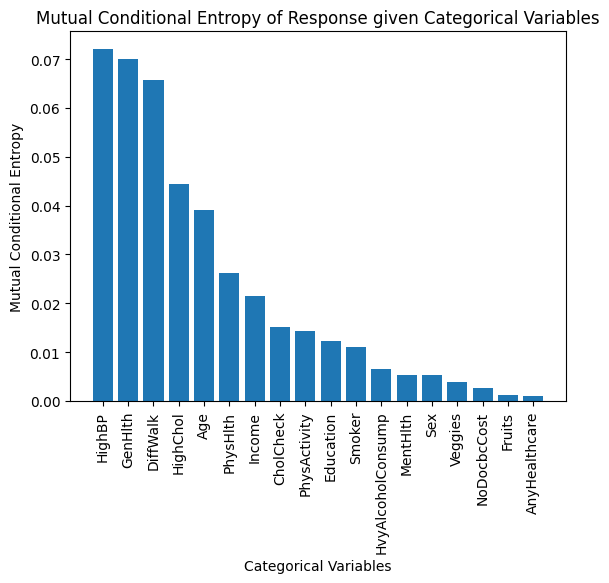

In [230]:
# bar plot of mutual conditional entropy
plt.bar(sorted_mutual_conditional_entropies.keys(), sorted_mutual_conditional_entropies.values())
plt.title('Mutual Conditional Entropy of Response given Categorical Variables')
plt.xlabel('Categorical Variables')
plt.ylabel('Mutual Conditional Entropy')
plt.xticks(rotation=90)
plt.show()